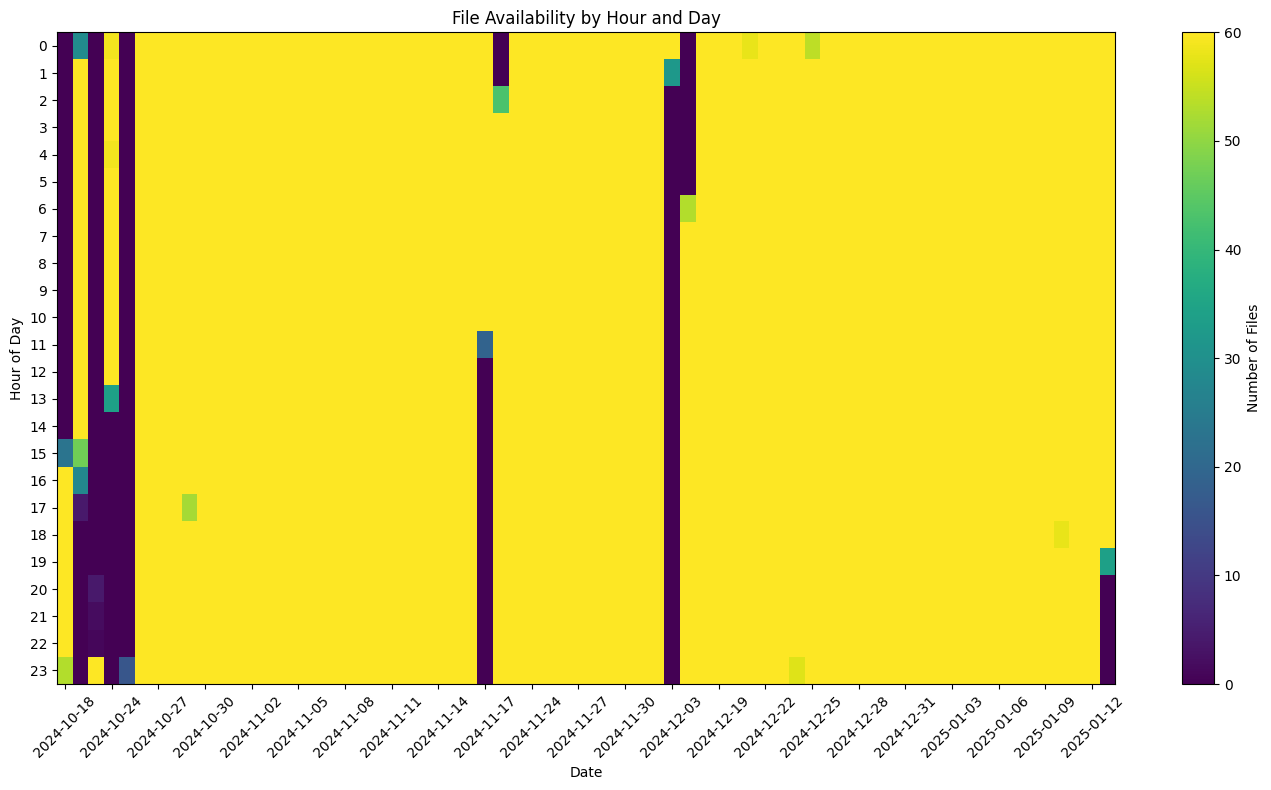

In [20]:
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Base directory to search
base_dir = "/1-fnp/petasaur/p-jbod1/das4orcas/incoming/"

# Search for all decimator files
glob_pattern = os.path.join(base_dir, "decimator_*.h5")
all_files = glob.glob(glob_pattern)

# Extract dates and hours from filenames
date_hour_pattern = re.compile(r"decimator_(\d{4}-\d{2}-\d{2})_(\d{2})")

date_hour_list = []
for file in all_files:
    match = date_hour_pattern.search(os.path.basename(file))
    if match:
        date_hour_list.append((match.group(1), int(match.group(2))))

# Create a DataFrame
df = pd.DataFrame(date_hour_list, columns=['date', 'hour'])

# Create a pivot table with dates as columns and hours as rows
pivot_table = pd.pivot_table(df, index='hour', columns='date', aggfunc='size', fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))
plt.imshow(pivot_table, aspect='auto', interpolation='nearest', cmap='viridis')
plt.colorbar(label='Number of Files')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.title('File Availability by Hour and Day')
plt.xticks(ticks=range(0, len(pivot_table.columns), max(1, len(pivot_table.columns)//20)), labels=pivot_table.columns[::max(1, len(pivot_table.columns)//20)], rotation=45)
plt.yticks(ticks=np.arange(0, 24, 1))
plt.tight_layout()
plt.show()